<a href="https://colab.research.google.com/github/magdalenamorawska/Uczenie-Maszynowe-w-Finansach-/blob/Use-Case-1/case_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Case 1 **

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import pandas as pd

In [19]:
dane = pd.read_csv('/content/creditcard.csv')
dane.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
value_counts = dane['Class'].value_counts()
print(value_counts)

0    284315
1       492
Name: Class, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [26]:
df_cleaned = dane.dropna()

In [27]:
X = df_cleaned.drop(columns='Class')
y=df_cleaned['Class']

In [28]:
X_train, X_test = train_test_split (X, test_size=0.33, random_state=42)
y_train, y_test = train_test_split (y, test_size=0.33, random_state=42)

In [29]:
print(X_train.shape, X_test.shape)

(190820, 30) (93987, 30)


In [30]:
print(y_train.shape,y_test.shape)

(190820,) (93987,)


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

confusion_matrix(y_test,y_pred)

accuracy 0.9985955504484663
precision 1.0
recall 0.11409395973154363


array([[93838,     0],
       [  132,    17]])

In [34]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt


In [35]:
oversampler = RandomOverSampler(random_state=42)
X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)
df_oversamp = pd.concat([y_oversamp, X_oversamp], axis=1)

Text(0, 0.5, 'Liczba wystąpień')

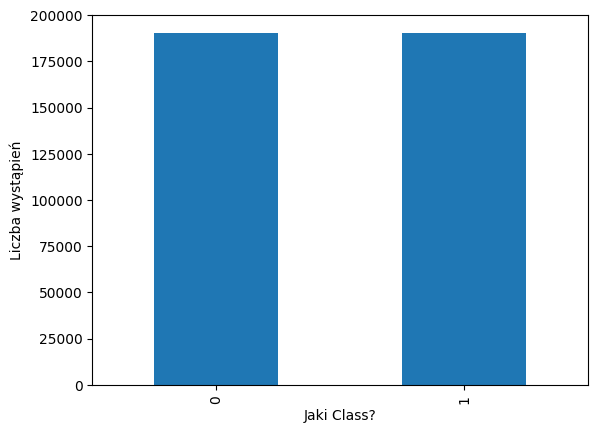

In [36]:
df_oversamp['Class'].value_counts().plot(kind='bar')
plt.xlabel("Jaki Class?")
plt.ylabel("Liczba wystąpień")

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_oversamp, y_oversamp)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

confusion_matrix(y_test,y_pred)

accuracy 0.9979039654420292
precision 0.2857142857142857
recall 0.21476510067114093


array([[93758,    80],
       [  117,    32]])

In [44]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [41]:
# Undersampling inicjacja
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

In [42]:
# Undersampling

random_state=42
knn.fit(X_resampled_under, y_resampled_under)
y_pred_under = knn.predict(X_test)
accuracy_under = accuracy_score(y_test, y_pred_under)
precision_under = precision_score(y_test, y_pred_under)
recall_under = recall_score(y_test, y_pred_under)
conf_matrix_under = confusion_matrix(y_test, y_pred_under)

print("Results after Undersampling:")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("Confusion Matrix:")
print(conf_matrix_under)

Results after Undersampling:
Accuracy: 0.6158511283475374
Precision: 0.0026832641770401107
Recall: 0.6510067114093959
Confusion Matrix:
[[57785 36053]
 [   52    97]]


In [45]:
#regresja logistyczna
weights = {0:1.0, 1:1.0}
model = LogisticRegression(solver=
'lbfgs',
class_weight=weights)

In [48]:
conf_matrix_uregression = confusion_matrix(y_test, y_pred_regression)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix_regression)

NameError: name 'y_pred_regression' is not defined